In [1]:
pip install matplotlib numpy


Note: you may need to restart the kernel to use updated packages.


In [2]:
import numpy as np

In [3]:
import pickle

# Load the data
with open('dead_agents_info.pkl', 'rb') as file:
    data = pickle.load(file)

# Check the structure of the data
print(f"Keys (generations): {data.keys()}")
print(f"Sample generation data: {data[next(iter(data))]}")


Keys (generations): dict_keys([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155, 156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168, 169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215,

In [5]:
import matplotlib.pyplot as plt

generations = sorted(data.keys())
state_stats = {"moving_to_food": [], "waiting": [], "mating as male": [], "mating as female": [], "searching_for_food":[], "Aproach_towards_nearest":[]}
energy_levels = []
reproductive_success = []

for gen in generations:
    gen_data = data[gen]
    total_energy = 0
    total_reproductive_success = 0
    state_totals = {state: 0 for state in state_stats}

    for agent in gen_data["agents"]:
        # Sum up state transitions
        for state, counts in agent["state_counter_dict"].items():
            state_totals[state] += sum(counts)
        
        # Accumulate energy and reproductive success
        total_energy += agent["energy_level"]
        total_reproductive_success += agent["reproductive_success"]

    # Normalize and append metrics
    num_agents = len(gen_data["agents"])
    energy_levels.append(total_energy / num_agents if num_agents > 0 else 0)
    reproductive_success.append(total_reproductive_success / num_agents if num_agents > 0 else 0)
    for state, total in state_totals.items():
        state_stats[state].append(total / num_agents if num_agents > 0 else 0)


In [46]:
import matplotlib.pyplot as plt

generations = sorted(data.keys())
state_stats = {"moving_to_food": [], "waiting": [], "mating as male": [], "mating as female": [], "searching_for_food":[], "Aproach_towards_nearest":[]}
energy_levels = []
reproductive_success = []

for gen in generations:
    gen_data = data[gen]
    total_energy = 0
    total_reproductive_success = 0
    state_totals = {state: 0 for state in state_stats}

    for agent in gen_data["agents"]:
        # Sum up state transitions
        for state, counts in agent["state_counter_dict"].items():
            state_totals[state] += sum(counts)
        
        # Accumulate energy and reproductive success
        total_energy += agent["energy_level"]
        total_reproductive_success += agent["reproductive_success"]

    # Normalize and append metrics
    num_agents = len(gen_data["agents"])
    energy_levels.append(total_energy / num_agents )
    total_reproductive_success=total_reproductive_success/2
    reproductive_success.append(total_reproductive_success )
    for state, total in state_totals.items():
        state_stats[state].append(total / num_agents if num_agents > 0 else 0)


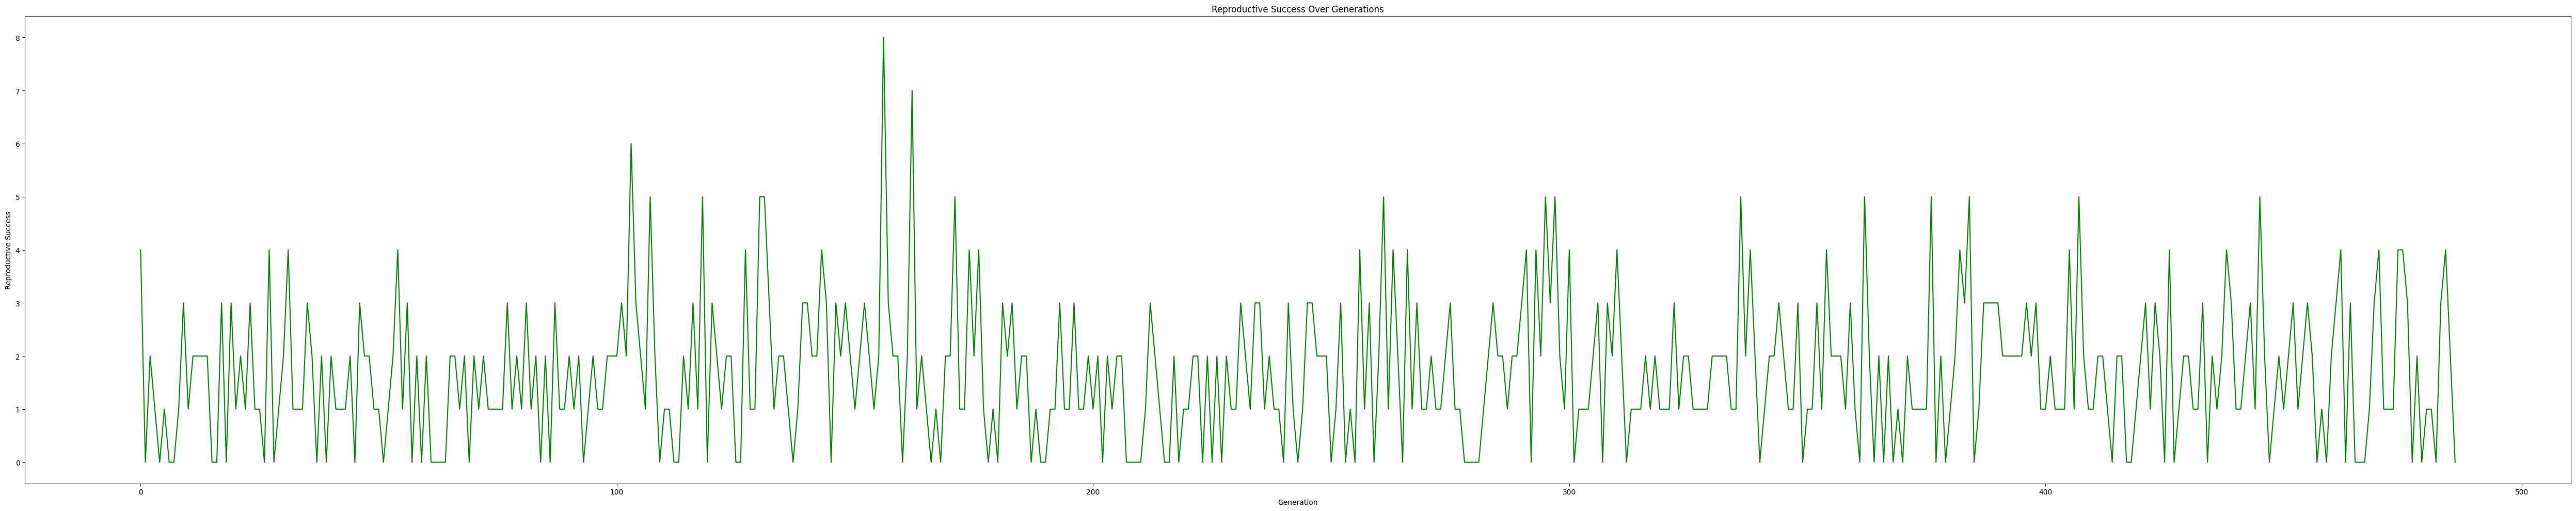

In [47]:
plt.figure(figsize=(50, 10))
# Plot reproductive success
plt.plot(generations, reproductive_success, color="green")
plt.title("Reproductive Success Over Generations")
plt.xlabel("Generation")
plt.ylabel("Reproductive Success")

plt.tight_layout()
plt.show()

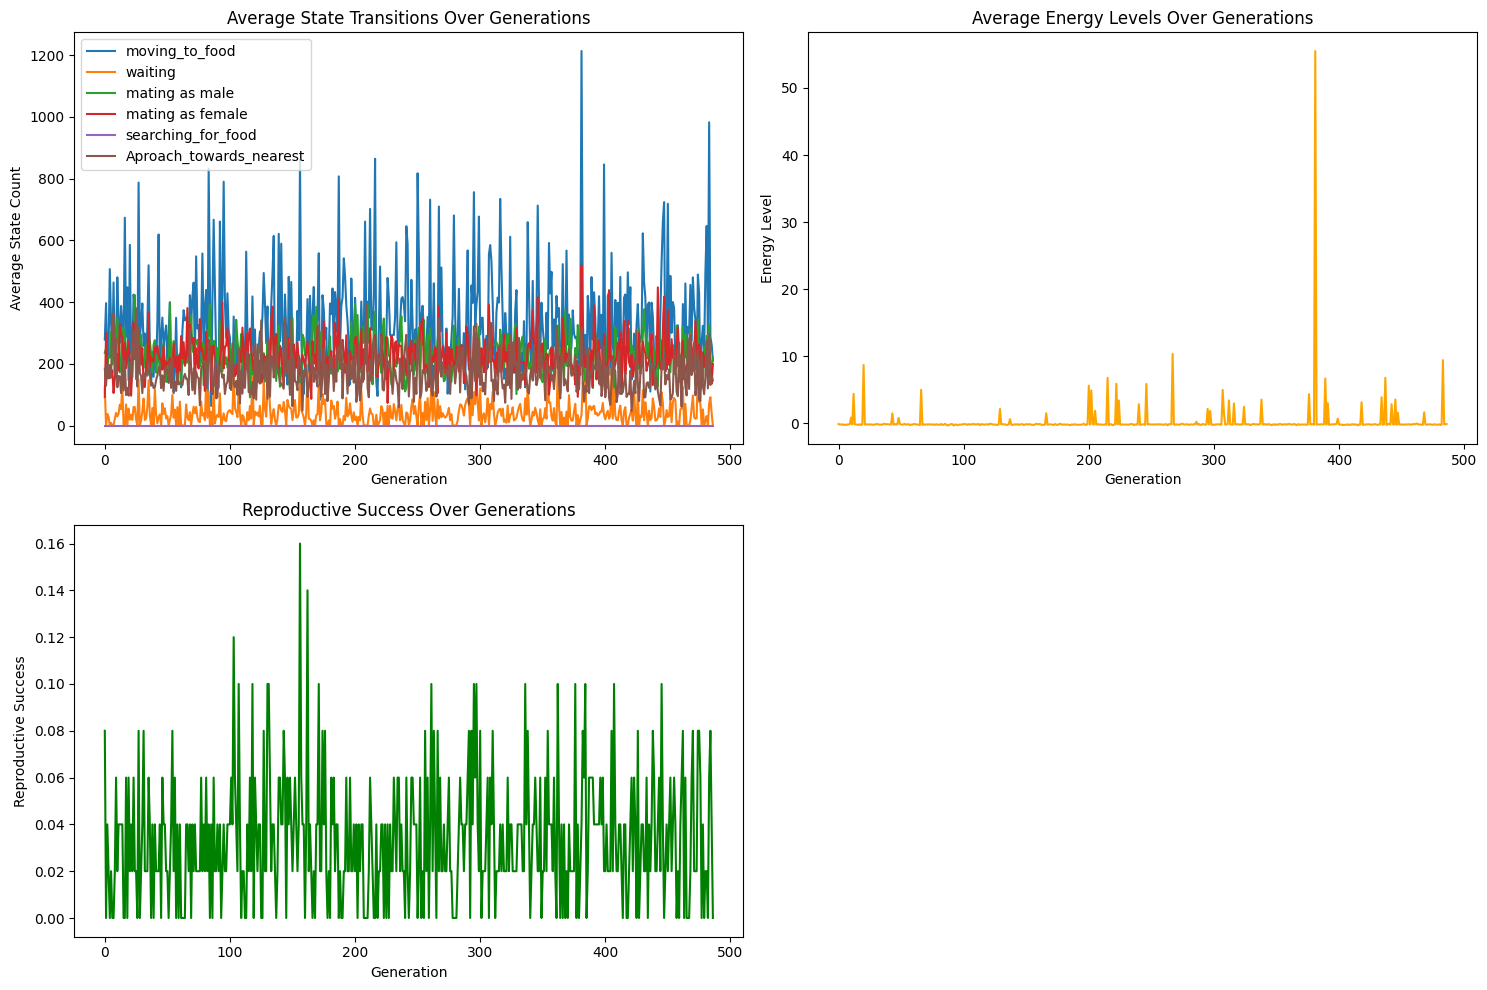

In [39]:
# Plot state transitions
plt.figure(figsize=(15, 10))

plt.subplot(2, 2, 1)
for state, stats in state_stats.items():
    plt.plot(generations, stats, label=state)
plt.title("Average State Transitions Over Generations")
plt.xlabel("Generation")
plt.ylabel("Average State Count")
plt.legend()

# Plot energy levels
plt.subplot(2, 2, 2)
plt.plot(generations, energy_levels, color="orange")
plt.title("Average Energy Levels Over Generations")
plt.xlabel("Generation")
plt.ylabel("Energy Level")

# Plot reproductive success
plt.subplot(2, 2, 3)
plt.plot(generations, reproductive_success, color="green")
plt.title("Reproductive Success Over Generations")
plt.xlabel("Generation")
plt.ylabel("Reproductive Success")

plt.tight_layout()
plt.show()


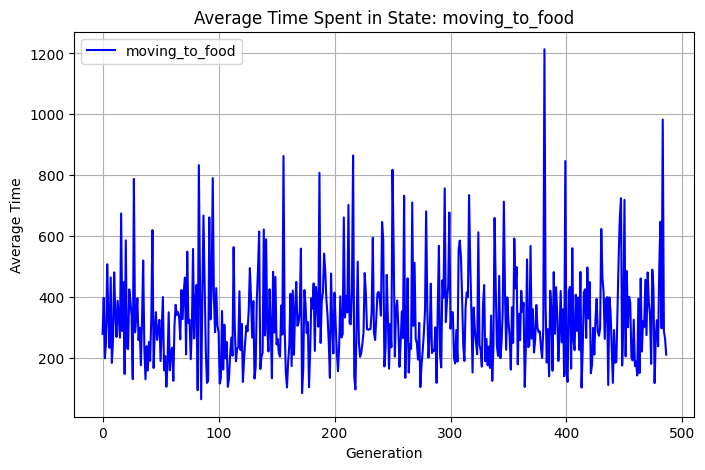

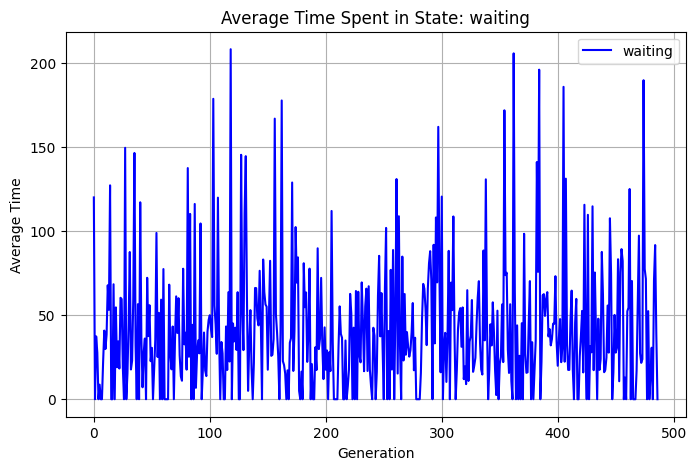

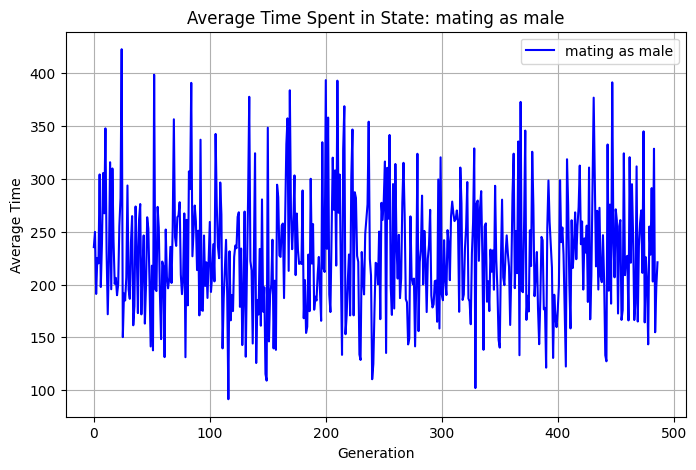

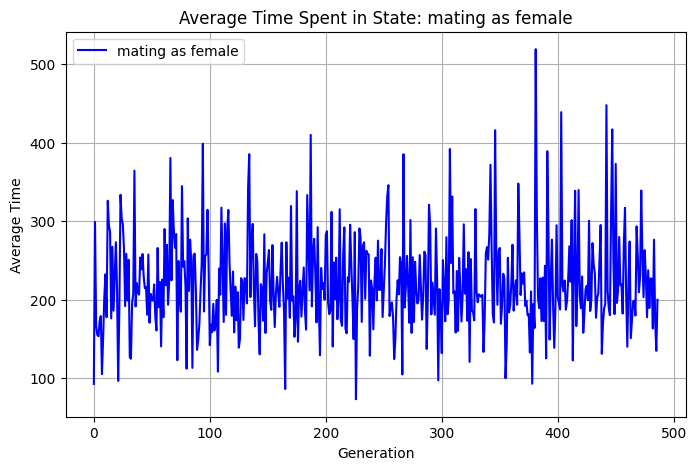

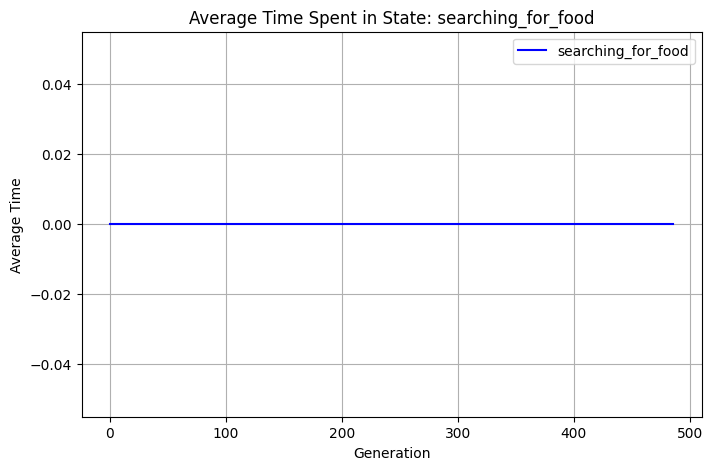

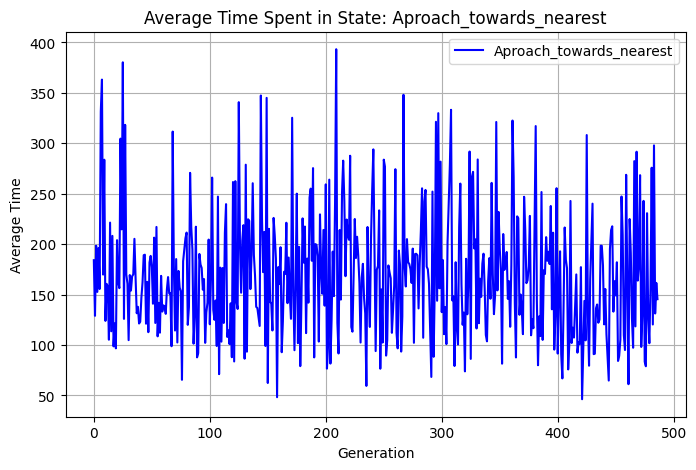

In [7]:
for state, stats in state_stats.items():
    plt.figure(figsize=(8, 5))
    plt.plot(generations, stats, label=state, color="blue")
    plt.title(f"Average Time Spent in State: {state}")
    plt.xlabel("Generation")
    plt.ylabel("Average Time")
    plt.grid(True)
    plt.legend()
    plt.show()


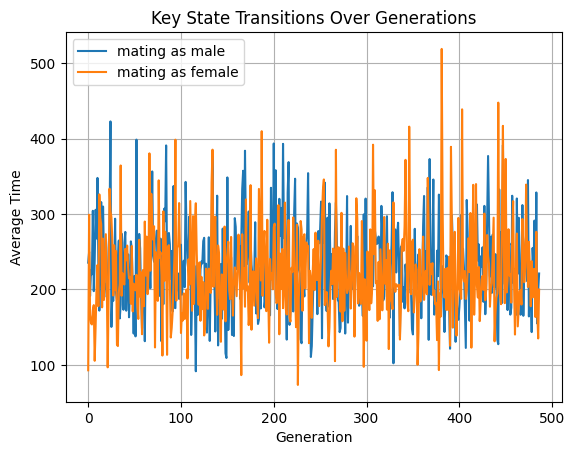

In [8]:
key_states = ["mating as male", "mating as female"]
for state in key_states:
    plt.plot(generations, state_stats[state], label=state)

plt.title("Key State Transitions Over Generations")
plt.xlabel("Generation")
plt.ylabel("Average Time")
plt.legend()
plt.grid(True)
plt.show()


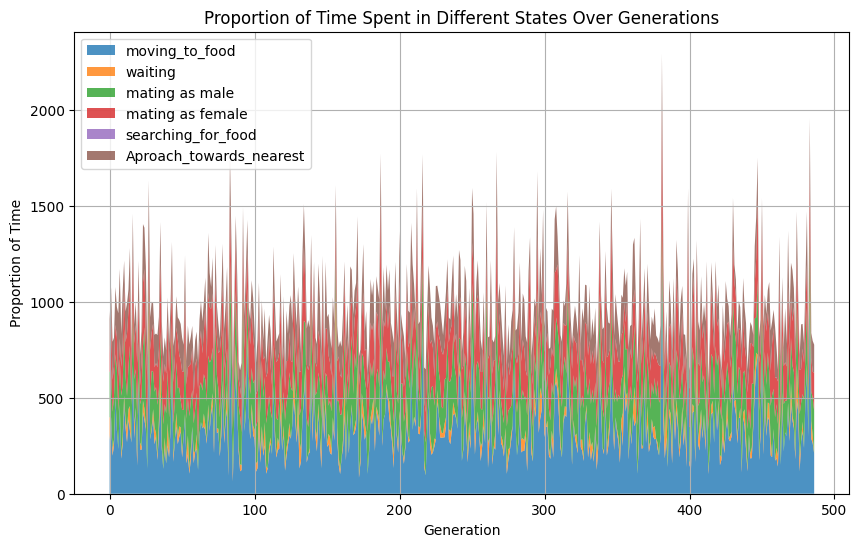

In [13]:
# Convert state stats to a stacked format
states = list(state_stats.keys())
stacked_data = np.array([state_stats[state] for state in states])

plt.figure(figsize=(10, 6))
plt.stackplot(generations, stacked_data, labels=states, alpha=0.8)
plt.title("Proportion of Time Spent in Different States Over Generations")
plt.xlabel("Generation")
plt.ylabel("Proportion of Time")
plt.legend(loc="upper left")
plt.grid(True)
plt.show()


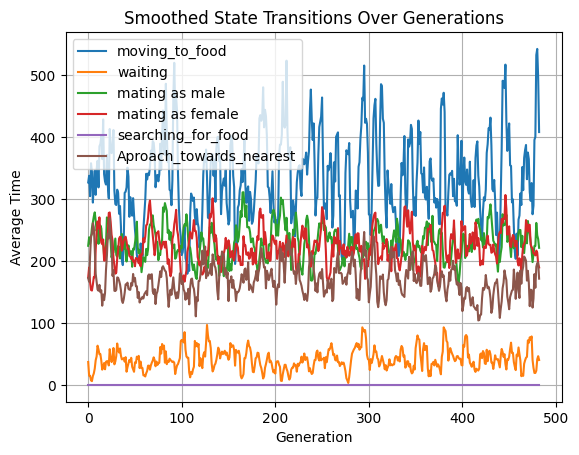

In [14]:
def moving_average(data, window_size=5):
    return np.convolve(data, np.ones(window_size)/window_size, mode='valid')

for state, stats in state_stats.items():
    smoothed_stats = moving_average(stats)
    plt.plot(smoothed_stats, label=state)

plt.title("Smoothed State Transitions Over Generations")
plt.xlabel("Generation")
plt.ylabel("Average Time")
plt.legend()
plt.grid(True)
plt.show()


In [12]:
pip install plotly


   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
   ---------------------------------------- 0.0/19.1 MB ? eta -:--:--
    --------------------------------------- 0.3/19.1 MB ? eta -:--:--
   - -------------------------------------- 0.5/19.1 MB 882.6 kB/s eta 0:00:21
   - -------------------------------------- 0.5/19.1 MB 882.6 kB/s eta 0:00:21
   - -------------------------------------- 0.5/19.1 MB 882.6 kB/s eta 0:00:21
   - -------------------------------------- 0.8/19.1 MB 621.9 kB/s eta 0:00:30
   -- ------------------------------------- 1.0/19.1 MB 709.1 kB/s eta 0:00:26
   -- ------------------------------------- 1.3/19.1 MB 789.6 kB/s eta 0:00:23
   --- ------------------------------------ 1.6/19.1 MB 892.9 kB/s eta 0:00:20
   --- ------------------------------------ 1.8/19.1 MB 898.8 kB/s eta 0:00:20
   ---- ----------------------------------- 2.1/19.1 MB 910.7 kB/s eta 0:00:19
   ---- -

ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'C:\\Python312\\etc\\jupyter\\nbconfig'
Consider using the `--user` option or check the permissions.



In [15]:
pip install pandas


In [16]:
import plotly.express as px
import pandas as pd

# Convert to a DataFrame
df = pd.DataFrame(state_stats, index=generations)
df['Generation'] = generations
fig = px.line(df, x="Generation", y=df.columns[:-1], title="State Transitions Over Generations")
fig.show()


In [17]:
import pickle
import pandas as pd

# Load the data
with open('dead_agents_info.pkl', 'rb') as f:
    dead_agents_data = pickle.load(f)

# Convert data into a pandas DataFrame
all_data = []
for generation, details in dead_agents_data.items():
    for agent in details["agents"]:
        agent["generation_no"] = generation
        all_data.append(agent)

df = pd.DataFrame(all_data)


In [19]:
pip install seaborn

Note: you may need to restart the kernel to use updated packages.


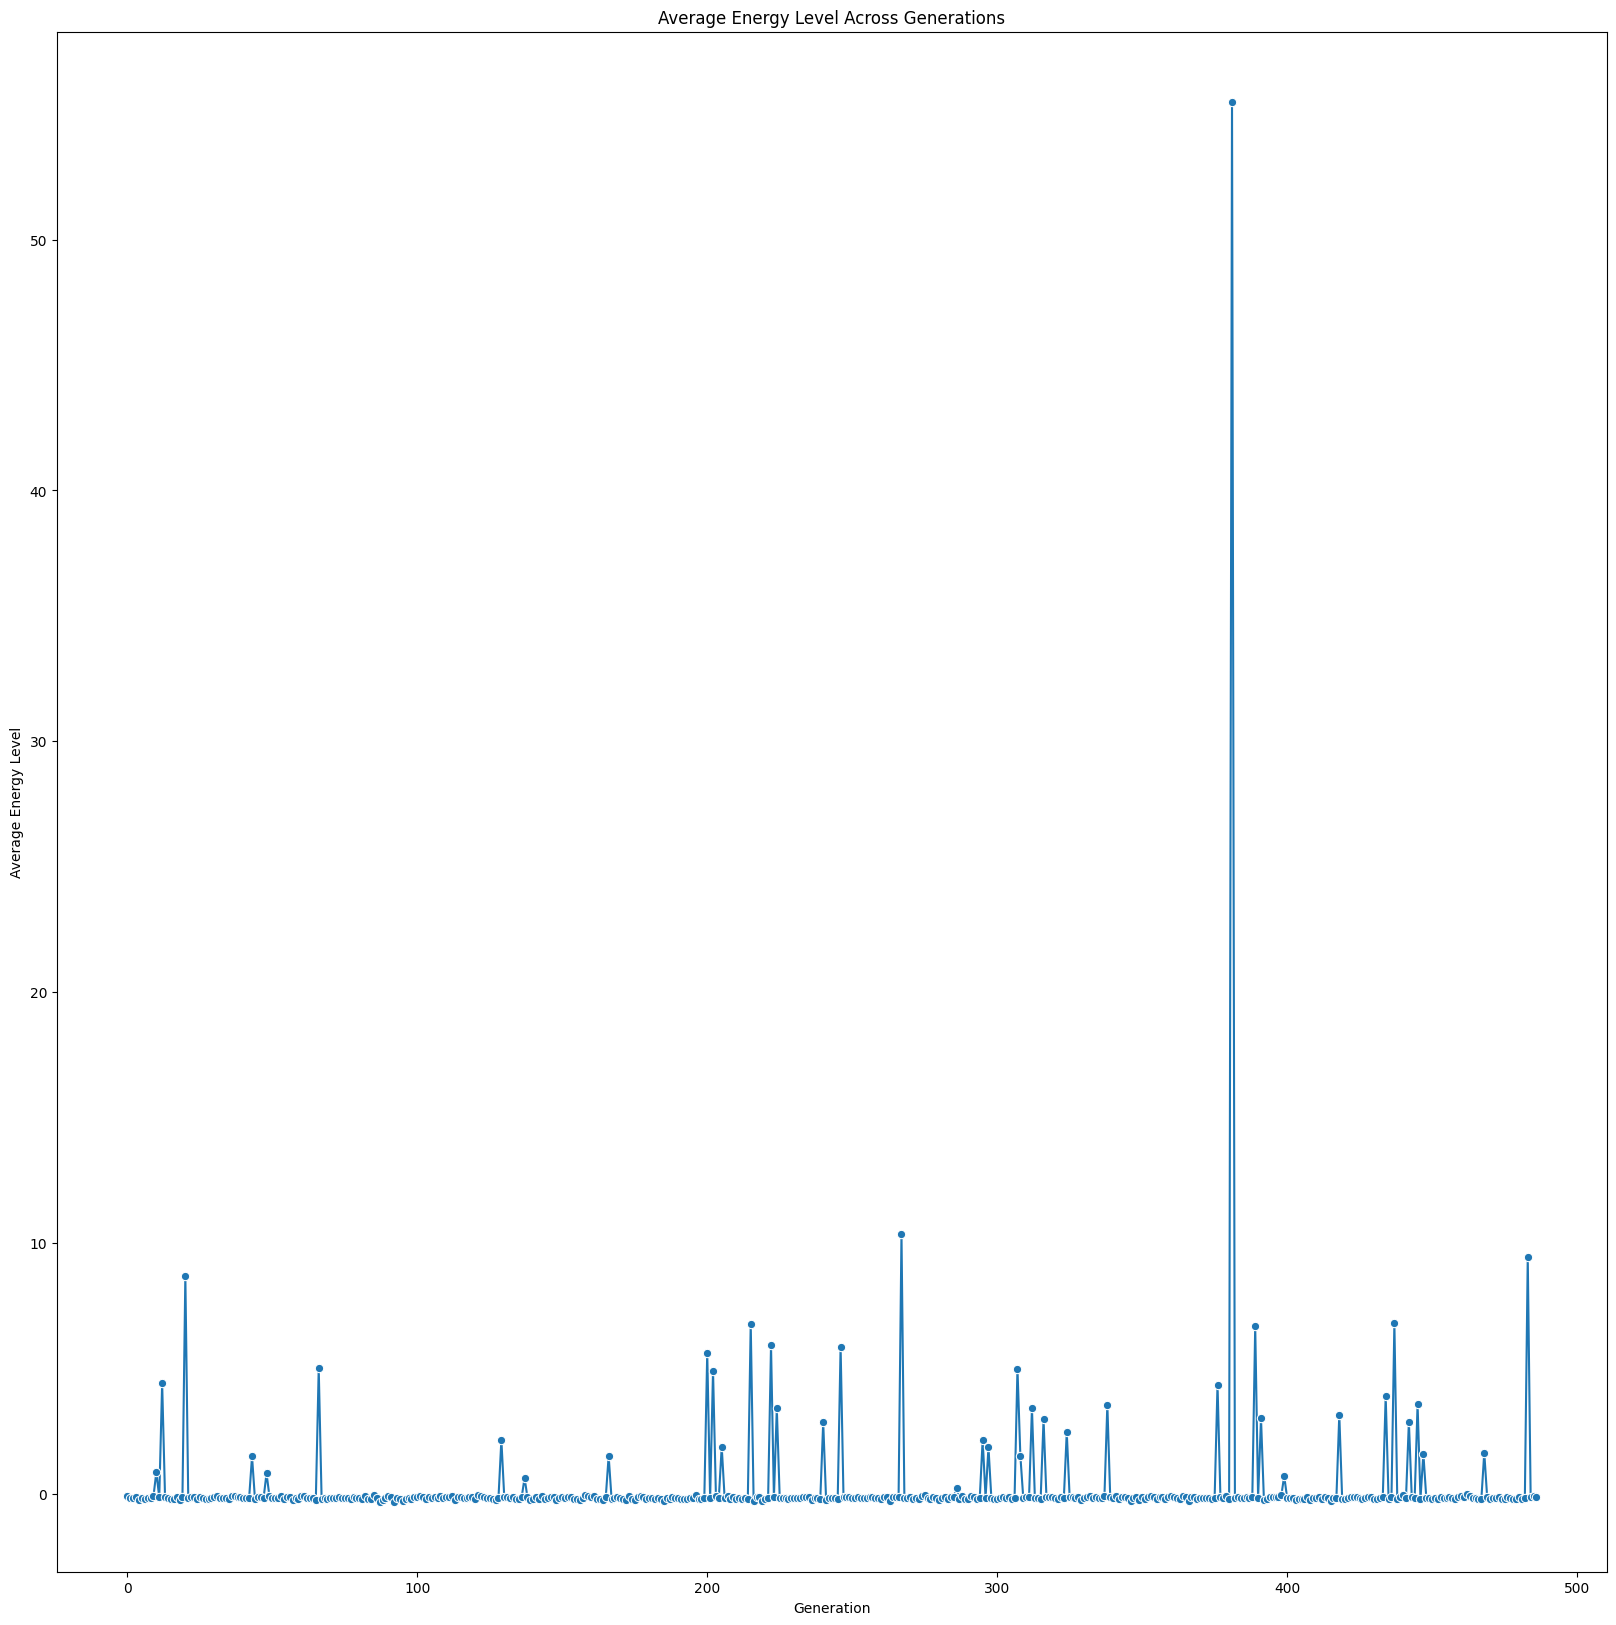

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Group by generation and calculate the average energy level
avg_energy = df.groupby("generation_no")["energy_level"].mean()

# Plot the results
plt.figure(figsize=(20, 20))
sns.lineplot(x=avg_energy.index, y=avg_energy.values, marker='o')
plt.title("Average Energy Level Across Generations")
plt.xlabel("Generation")
plt.ylabel("Average Energy Level")
plt.show()


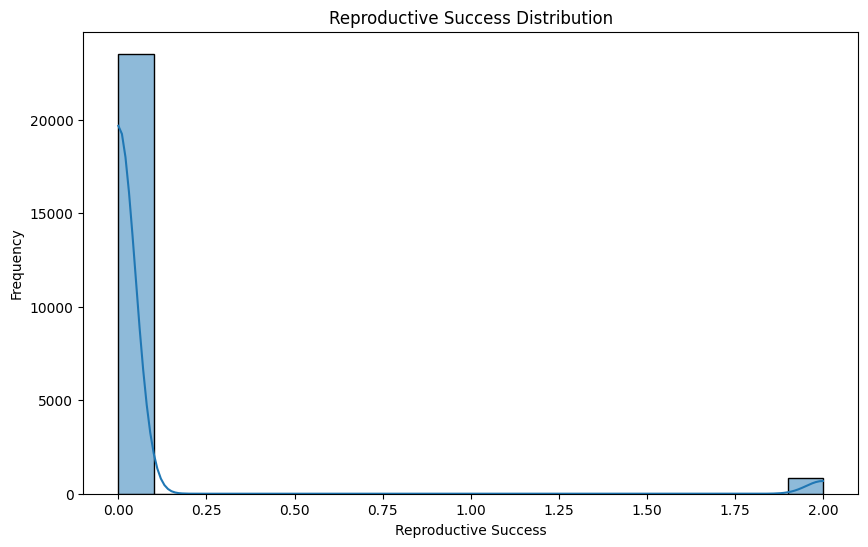

In [23]:
# Distribution of reproductive success
plt.figure(figsize=(10, 6))
sns.histplot(df["reproductive_success"], kde=True, bins=20)
plt.title("Reproductive Success Distribution")
plt.xlabel("Reproductive Success")
plt.ylabel("Frequency")
plt.show()


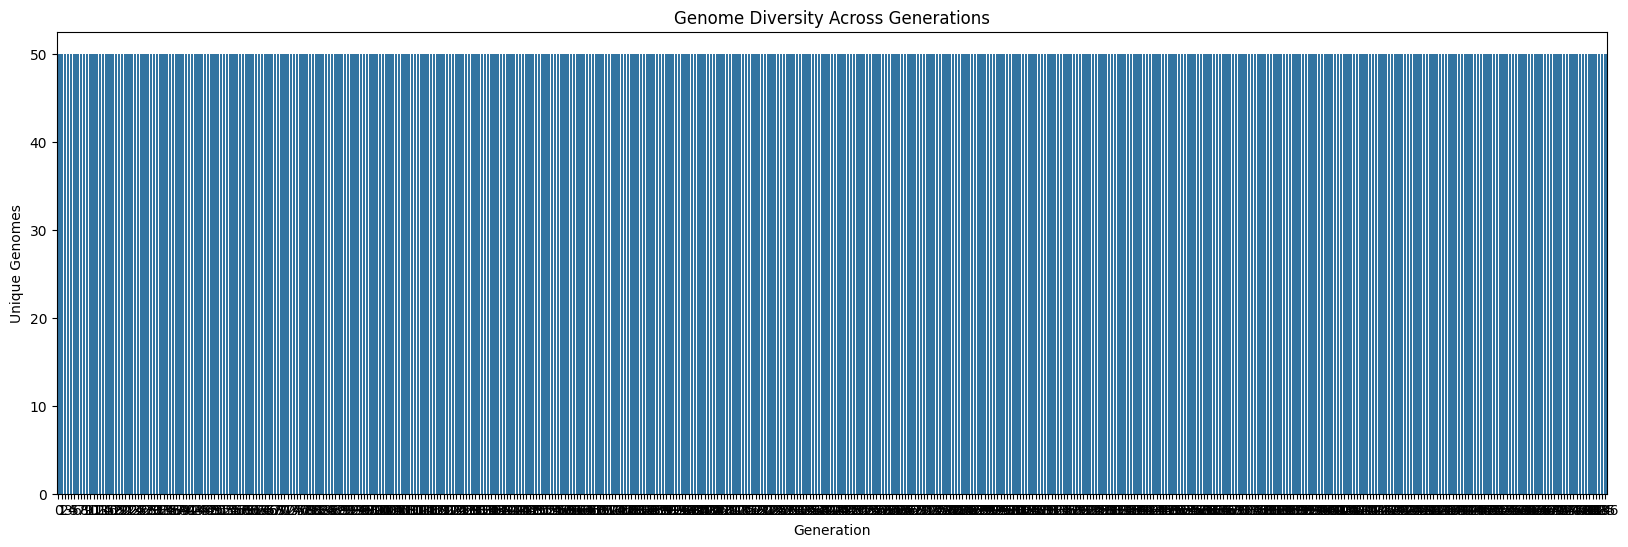

In [29]:
# Count unique genomes per generation
df["genome_str"] = df["genome"].apply(lambda g: str(g))  # Convert genome to string for counting
genome_diversity = df.groupby("generation_no")["genome_str"].nunique()

# Plot genome diversity
plt.figure(figsize=(20, 6))
sns.barplot(x=genome_diversity.index, y=genome_diversity.values)
plt.title("Genome Diversity Across Generations")
plt.xlabel("Generation")
plt.ylabel("Unique Genomes")
plt.show()


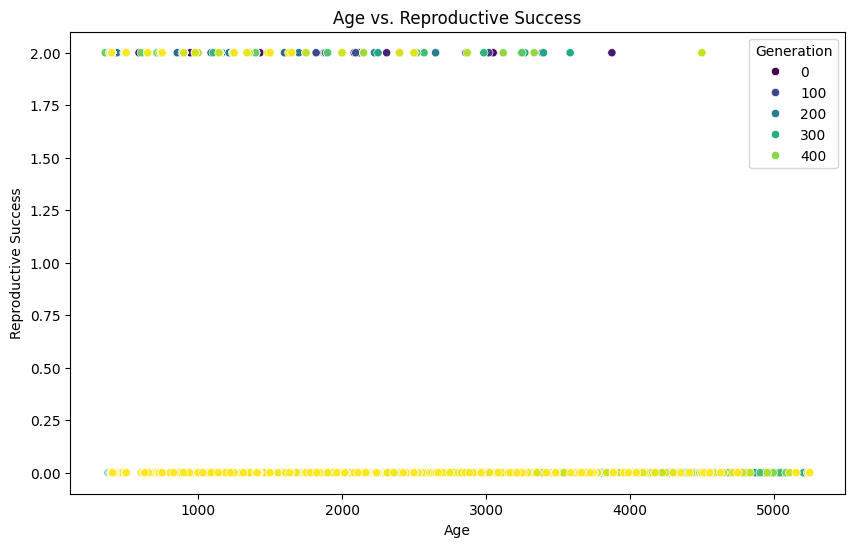

In [30]:
# Scatter plot of age vs. reproductive success
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x="age", y="reproductive_success", hue="generation_no", palette="viridis")
plt.title("Age vs. Reproductive Success")
plt.xlabel("Age")
plt.ylabel("Reproductive Success")
plt.legend(title="Generation")
plt.show()


In [31]:
correlations = df.corr()
print(correlations)
sns.heatmap(correlations, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


ValueError: setting an array element with a sequence.

In [32]:
survival_rate = df.groupby("generation_no")["age"].mean()


In [33]:
df.to_excel("agent_analysis.xlsx", index=False)


ModuleNotFoundError: No module named 'openpyxl'